Classification of banknotes as forged or authentic

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.linalg as lin
import math

Perceptron algorithm:

algorithm:


step1: initialize $w = w^(0)$ , $t = 0$ 

step2: pick some random $(x_n , y_n)$

 step 3:if current $w $ makes a mistake on $(x_n , y_n)$ i.e., $y_n w^(t)^T X_n<0$ 

$$w(t+1) = w^(t) + y_n x_n$$

$$ t = t+1$$

step4: if not converged go to step 3

In [38]:
#perceptron
#this is the perceptron function here the inputs are 
#the the training data, initial weights and number of iterations
#and returns weight vector w
def perceptron(data, init_, n_iter):
    w = init_    #initializing the weight vector
    for i in range(n_iter):
#selection of data randomly from the dataset 
        random_sample = data[np.random.choice(data.shape[0], size=1, replace=False)][0]
    #breaking into features and y
        X, y = random_sample[:-1], random_sample[-1]
        #checking if y*w.x is less than zero
        if(y*np.dot(np.transpose(w), X) < 0):
            #if the above condition satisfies then upgrade the weight
            w += y*X
               
    return w


Functions to make predictions using the algorithm for the banknotes dataset and Preprocessing
the dataset to handle missing and anomalous data.

To make the predictions we can check using $sign(w^T x_* )$

In [39]:
dataset = pd.read_csv('databank.csv')
z= dataset.isnull().sum()


# checking if there are any null data in the dataset
z= dataset.isnull().sum()
#filling the empty values using mean of the respective feature
missing_col = ['variance']
for i in missing_col:
 dataset.loc[dataset.loc[:,i].isnull(),i]=dataset.loc[:,i].mean()
missing_col = ['skewness']
for i in missing_col:
 dataset.loc[dataset.loc[:,i].isnull(),i]=dataset.loc[:,i].mean()
missing_col = ['curtosis']
for i in missing_col:
 dataset.loc[dataset.loc[:,i].isnull(),i]=dataset.loc[:,i].mean()
missing_col = ['entropy']
for i in missing_col:
 dataset.loc[dataset.loc[:,i].isnull(),i]=dataset.loc[:,i].mean() 
z1= dataset.isnull().sum()
df = pd.DataFrame(dataset)
# Converting the daataframe to numpy 
dataset =df.to_numpy()
np.random.shuffle(dataset)
le = dataset.shape[0] #finding the total number of columns 
w =[1,1,1,1]
#converting 0s into -1s as the perceptron algo deals with the dataset with classes 1 and -1
for i in range(0,le): 
    if dataset[i,-1] == 0:
        dataset[i,-1] = -1


#predicting the data
#for predicting the data need to check if w.x is positive or negative 
# if its positive then the data belongs to +1 class or it is -1 
def predict(x,w):
    #finding the number of rows in the input
    l = x.shape[0]
    #initializing the ypred 
    ypred =np.zeros(l)
    #checking if w.x is positive or negative 
    for i in range(0,l):
        p = np.dot(w, x[i,:])
        if p < 0:
            ypred[i] = -1
        elif p>=0:
            ypred[i] = 1
    return ypred 


In [40]:
#function for making the confusion matrix
def confusion(a,p):
    #finding the length of l
    l = a.shape[0]
    #initialize the value of m
    m =np.zeros((2,2))
    
    for i in range(0,l):
        if a[i] ==p[i]==-1:   # true positive
            m[0,0] = m[0,0] +1
        elif a[i] ==p[i]==1:   #true negative
            m[1,1] = m[1,1] +1
        elif a[i] ==1 and p[i]==-1:  #false negative
            m[1,0] = m[1,0] +1   
        elif a[i] ==-1 and p[i]==1:   #false positive
            m[0,1] = m[0,1] +1  
            
    return m
         

Training the algorithm on the dataset using cross-validation and report cross-validated test set error


To execute the cross validation the following algorithm is used:

1. The entire dataset is divided into 20 equal sets

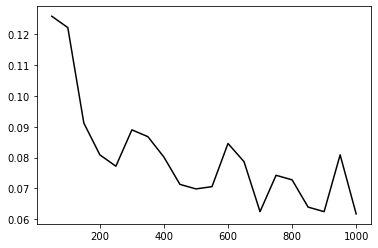

In [42]:
def crossvalidation(k):
    
    l = dataset.shape[0]
    n =20
    a= math.trunc((l/n))
    predi = np.zeros(a)
    accu = np.zeros(n)
    # here p is used to make cross validation 
    for p in range(1,n+1):
        # cross validation breaking a dataset of total rows into 20 equal parts and assigning 1 part for validation set for each iteration and
        # finding the error
        #breaking the dataset into features and y
        testx = dataset[(p-1)*a: p*a, :-1]
        testy = dataset[(p-1)*a: p*a,  -1]       
        traind = np.delete(dataset, list(range((p-1)*a, p*a)), 0)       
        weight = perceptron(traind,w,k)   #fiinding out the weight vector
        predi = predict(testx,weight)     #finding out the predicted vector

        conf = confusion(testy,predi)     #making the confusion matrix
        #finding out the error percentage that is= (total no of wrongs )/ (total  no of dataset)        
        accu[p-1] = (conf[0,1] + conf[1,0]) /( conf[0,0] + conf[1,0] + conf[0,1] + conf[1,1])  
        
        
    ans = np.mean(accu)   #finding the mean of the errors
        
        
    return ans

#since the data is selected at random it is hard to find the correct value of the best fit of k(no if iterations) variable in the function
#so we have used k for each run of the for loop and ran it through cross validation
#each time the k goes to cross validation function the function finds error percentage for 20 test sets and gives mean 
# of the test sets. this can hellp in better understanding of the best fit of number of iterations

cv = np.zeros(20)
for i in range(0,20):
    n= 50+ i*50
    cv[i] = crossvalidation(n)   


h =  list(range(50,1001,50))      
 
plt.plot(h,cv,'k')     
     

 from the above cross validation anaysis it is clear that 550 is the best value for no of iterations as the error is
 is minimum here and also if we increase the value even though it may be more accurate the runtime increases.

$$p = \frac{TP}{TP+FP}$$

$$r = \frac{TP}{TP+FN}$$

$$F_1 = \frac{2pr}{p+r}$$

In [43]:
#function for finding p, r and f1 values
def f1(c):
    p = (c[0,0])/(c[0,0] + c[1,0])     #finding the precision using confusion matrix
    r = (c[0,0])/(c[0,0] + c[0,1])     #finding the recall using confusion matrix
    
    f = 2*p*r/(p+r)                    # finding f1 value using precision and recall
    
    return f

Using a held out validation set and reporting F1 score on the held out set for your best
model

In [44]:
# held out validation set with 80-20 percentage of training and test data respectively and use 550 as the number of iterations
traind = dataset[0: math.trunc(0.8*(le)),:]  # importing 80 percentage of the data from the total as training data
testx = dataset[:math.trunc(0.2*(le))  ,:-1] # importing 20 percentage of the data from the total as test data
testy = dataset[:math.trunc(0.2*(le))  ,-1]
w =[1,1,1,1]                          # initializing the weight vector
weightq1d = perceptron(traind,w,550)     #finding weight using perceptron algo
predi = predict(testx,weightq1d)      #predicting values using predict function 
conf = confusion(testy,predi)     #finding confusion matrix 

print(f1(conf))   # finding f1 value

0.9211356466876972
